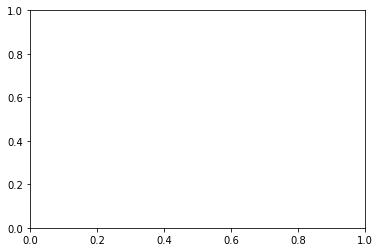

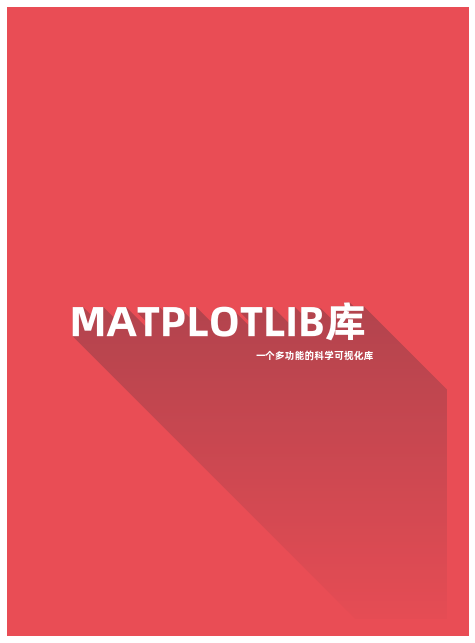

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.collections import PolyCollection
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#更改字体，支持中文。
prop = FontProperties(fname='fonts/Alibaba-PuHuiTi-Bold.otf', weight=100)

red = np.array([233, 77, 85, 255]) / 255
darkred = np.array([130, 60, 71, 255]) / 255

fig = plt.figure(figsize=(14.8 / 2.54, 21 / 2.54))

ax = fig.add_axes([0, 0, 1, 1], aspect=1, xlim=[-10, 10], ylim=[-14.2, 14.2])
ax.axis("off")

# Text path
path = TextPath((0, 0), "MATPLOTLIB库", size=2, prop=prop)

# Text centering
V = path.vertices
xmin, xmax = V[:, 0].min(), V[:, 0].max()
ymin, ymax = V[:, 1].min(), V[:, 1].max()
V -= (xmin + xmax) / 2 + 1, (ymin + ymax) / 2


# Compute shadow by iterating over text path segments
polys = []
for (point, code) in path.iter_segments(curves=False):
    if code == path.MOVETO:
        points = [point]
    elif code == path.LINETO:
        points.append(point)
    elif code == path.CLOSEPOLY:
        points.append(points[0])
        points = np.array(points)
        for i in range(len(points) - 1):
            p0, p1 = points[i], points[i + 1]
            polys.append([p0, p1, p1 + (+20, -20), p0 + (+20, -20)])

# Display shadow
collection = PolyCollection(
    polys, closed=True, linewidth=0.0, facecolor=darkred, zorder=-10
)
ax.add_collection(collection)

# Display text
patch = PathPatch(path, facecolor="white", edgecolor="none", zorder=10)
ax.add_artist(patch)

# Transparent gradient to fade out shadow
I = np.zeros((200, 1, 4)) + red
ax.imshow(I, extent=[-11, 11, -15, 15], zorder=-20, clip_on=False)
I[:, 0, 3] = np.linspace(0, 1, len(I))
ax.imshow(I, extent=[-11, 11, -15, 15], zorder=0, clip_on=False)


ax.text(
    6.5,
    -1.75,
    "一个多功能的科学可视化库",
    color="white",
    ha="right",
    va="baseline",
    size=10,
    #family="Pacifico",
    zorder=30,
    fontproperties=prop
)

# Save and show result
plt.savefig("text-shadow.pdf")
plt.savefig("text-shadow.png", dpi=600)
plt.show()
